# Analytics Dashboard for Recruiter using Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
import dash
from dash import dash_table as dt
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

In [3]:
df = pd.read_csv('CV_Dataframe.csv')

In [4]:
df.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)

In [5]:
df

,ID,Name,Location,Email Address,Degree,College Name,Skills,Applied Role
0,0,Govardhana K,Bengaluru,indeed.com/r/Hartej-Kathuria/04181c5962a4af19,B.E in Computer Science Engineering,Adithya Institute of Technology,"Functional Testing, Blue Prism, Qtp ADDITIONA...",Senior Software Engineer
1,1,Harini Komaravelli,"Oracle,",indeed.com/r/Imgeeyaul-Ansari/a7be1cc43a434ac4,MCA,Test Analyst,"Python (2 years), SQL. (1 year), NOSQL (1 year...",Senior Software Engineer
2,2,Hartej Kathuria,Hyderabad,indeed.com/r/Jitendra-Babu/bc3ea69a183395ed,B.Sc. in Computer Science,Osmania University,: Languages: Core Java Front end/GUI Tools ...,Associate Consultant
3,3,Ijas Nizamuddin,Hyderabad,indeed.com/r/Jyotirbindu- Patnaik/77e3ceda47fb...,Birla Institute Of Technology,Osmania University,SQL Oracle,Test Analyst
4,4,Imgeeyaul Ansari,Hyderabad,indeed.com/r/Karthihayini- C/627254c443836b3c,Bachelor of Enginerring in Information Technology,University College Of Engineering,ITIL foundation,QA Analyst
...,...,...,...,...,...,...,...,...
144,144,Puneeth R,hyderbad,indeed.com/r/Sridevi-H/63703b24aaaa54e4,B.B.A in UIT,Member of Discipline Committee in ALGORYTHM,TALLY MICROSOFT DYNAMIC OPARATER MICIT,Technical Project Manager
145,145,Kandrapu Reddy,hyderbad,indeed.com/r/Raktim-Podder/32472fc557546084,BSc,Chitkara University,"EXCEL (Less than 1 year), OUTLOOK (Less than 1...",Arabic Language supporter (Content Analyst)
146,146,Vineeth Vijayan,Chennai,indeed.com/r/Pavithra-M/26f392ec8251143b,MSC,PES College of Engineering,"SAP HANA (4 years), SAP UI5/Fiori (4 years), A...",Chief Coordinator of LEAR
147,147,Rahul Tayade,Chandigarh,indeed.com/r/shrikant-desai/ cc6430615ce4d44a,B.C.A,Orange City Hospital & Research Institute,"AUDITING (Less than 1 year), CFA (Less than 1 ...",Technical Architect &


### Cleaning and Processing the Dataset

In [6]:
df['Applied Role'] = df['Applied Role'].str.title()
df['Applied Role']  = df['Applied Role'].str.strip()

In [7]:
df['Applied Role'] = df['Applied Role'].str.replace('Senior', '')
df['Applied Role'] = df['Applied Role'].str.replace('Associate', '')
df['Applied Role'] = df['Applied Role'].str.replace('Systems Engineer', 'System Engineer')
df['Applied Role'] = df['Applied Role'].str.replace('Software Development', 'Software')

In [8]:
df.loc[df['Applied Role'].str.contains('Developer', case=False), 'Applied Role'] = 'Developer'
df.loc[df['Applied Role'].str.contains('Consultant', case=False), 'Applied Role'] = 'Consultant'
df.loc[df['Applied Role'].str.contains('Automation', case=False), 'Applied Role'] = 'Automation'
df.loc[df['Applied Role'].str.contains('Analyst', case=False), 'Applied Role'] = 'Analyst'

In [9]:
desig_count = df['Applied Role'].value_counts()
desig_count[:5]

Consultant           32
Developer            15
Analyst              13
Software Engineer    10
 System Engineer      8
Name: Applied Role, dtype: int64

In [10]:
loc_count = df['Location'].value_counts()
loc_count[:19]

Bengaluru         37
Hyderabad         21
Pune              10
Kolkata            9
Chennai            7
Noida              7
Mangalore          6
Bangalore          5
Delhi              4
Mumbai             4
Gurgaon            2
hyderbad           2
Bidar              2
Ghaziabad          2
Chandigarh         2
Salem              2
Senior             1
Orrisha            1
Irinchayam B.O     1
Name: Location, dtype: int64

### Visulaizing the Dataset and Creating Dashboard

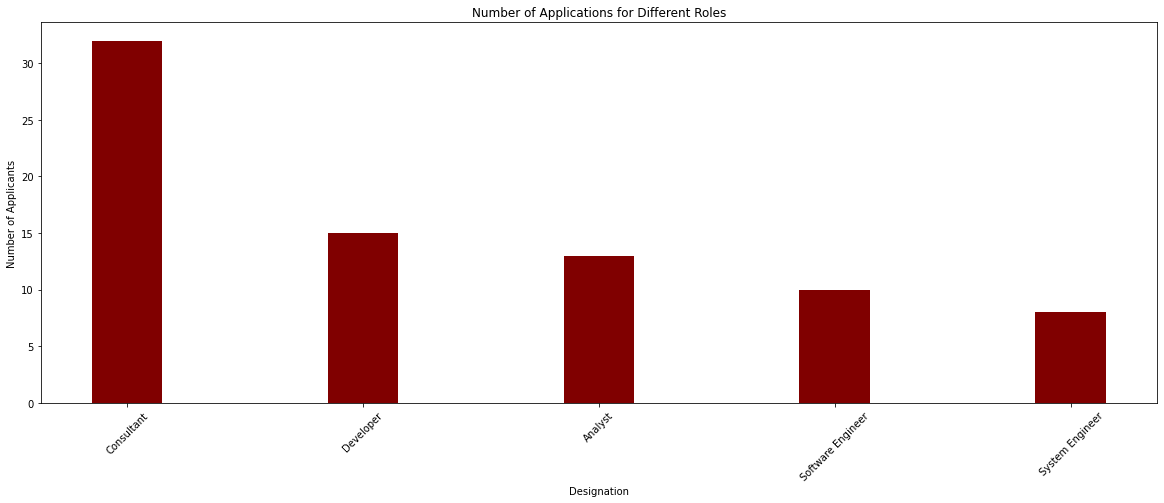

In [11]:
# Creating the bar plot
fig = plt.figure(figsize =(20, 7))
plt.bar(desig_count.index[:5], desig_count.values[:5], color ='maroon',width = 0.3)
 
plt.xlabel("Designation")
plt.ylabel("Number of Applicants")
plt.title("Number of Applications for Different Roles")
plt.xticks(rotation=45)
plt.show()

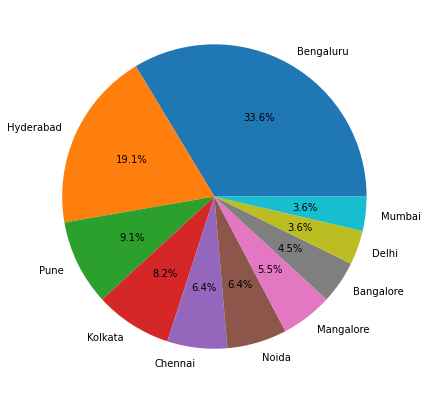

In [12]:
fig,ax = plt.subplots(figsize =(10, 7))
plt.pie(loc_count[:10].values, labels = loc_count[:10].index, autopct='%1.1f%%')
plt.show()

### Ranking and Sorting the CVs based on Requirement

##### Based on Role Available

In [13]:
role_requirement = "Analyst"
required_df = df[df['Applied Role'] == role_requirement]
not_required_df = df[df['Applied Role'] != role_requirement]

In [14]:
final_ranked_df = pd.concat([required_df,not_required_df], axis=0)

In [15]:
final_ranked_df

,ID,Name,Location,Email Address,Degree,College Name,Skills,Applied Role
3,3,Ijas Nizamuddin,Hyderabad,indeed.com/r/Jyotirbindu- Patnaik/77e3ceda47fb...,Birla Institute Of Technology,Osmania University,SQL Oracle,Analyst
4,4,Imgeeyaul Ansari,Hyderabad,indeed.com/r/Karthihayini- C/627254c443836b3c,Bachelor of Enginerring in Information Technology,University College Of Engineering,ITIL foundation,Analyst
5,5,Jay Madhavi,Hyderabad,indeed.com/r/Kartik-Sharma/cc7951fd7809f35e,BE (Computer Science) in Computer Science,Army institute of technology,"Destructive Testing (Less than 1 year), FORGE ...",Analyst
6,6,Jitendra Babu,Hyderabad,indeed.com/r/Kasturika- Borah/9e71468914b38ee8,B.com,Rashtriya Military School Bangalore - Bengalu...,"Program Management (2 years), Product Manageme...",Analyst
7,7,Jyotirbindu Patnaik,Bengaluru,indeed.com/r/Kavitha-K/8977ce8ce48bc800,B. Tech in Electronics and Communication,Rashtriya Military School Bangalore - Bengalu...,SAP Systems: SAP ECC 6.0. Product Tools: GRC 1...,Analyst
...,...,...,...,...,...,...,...,...
143,143,Rupesh Reddy,Noida,indeed.com/r/Puran-Mal/357ea77b3b002be6,MCA,Board (university),"SQL (1 year), HTML (Less than 1 year), INCIDEN...",Technical Project Manager
144,144,Puneeth R,hyderbad,indeed.com/r/Sridevi-H/63703b24aaaa54e4,B.B.A in UIT,Member of Discipline Committee in ALGORYTHM,TALLY MICROSOFT DYNAMIC OPARATER MICIT,Technical Project Manager
146,146,Vineeth Vijayan,Chennai,indeed.com/r/Pavithra-M/26f392ec8251143b,MSC,PES College of Engineering,"SAP HANA (4 years), SAP UI5/Fiori (4 years), A...",Chief Coordinator Of Lear
147,147,Rahul Tayade,Chandigarh,indeed.com/r/shrikant-desai/ cc6430615ce4d44a,B.C.A,Orange City Hospital & Research Institute,"AUDITING (Less than 1 year), CFA (Less than 1 ...",Technical Architect &


##### Based on Location Available

In [16]:
location_requirement = "Pune"
required_df = df[df['Location'] == location_requirement]
not_required_df = df[df['Location'] != location_requirement]

In [17]:
final_ranked_df = pd.concat([required_df,not_required_df], axis=0)
final_ranked_df

,ID,Name,Location,Email Address,Degree,College Name,Skills,Applied Role
10,10,Kartik Sharma,Pune,indeed.com/r/kimaya- sonawane/1f27a18d2e4b1948,Compucom Insitute of Information Technology,Degree College,"coding (Less than 1 year), HDL (Less than 1 ye...",Consultant
11,11,Kasturika Borah,Pune,indeed.com/r/Koushik-Katta/a6b19244854199ec,Bachelor of Engineering in Information Technology,AG&SGS Intermediate College 2011,"ANDROID (Less than 1 year), CISCO (Less than 1...",Consultant
12,12,Kavitha K,Pune,indeed.com/r/Kowsick- Somasundaram/3bd9e5de546...,Bachelor of Engineering in Engineering,Biju Patnaik University,"Jira, Ansible, Jenkins, Splunk, Nagios, Docker...",Developer
46,46,Ravi Shivgond,Pune,indeed.com/r/Sharan-Adla/3a382a7b7296a764,M.S. in Computer Engineering,Goa Institute of Management,SAP ABAP OOPS-ABAP,System Engineer
47,47,Rohit Bijlani,Pune,indeed.com/r/Shreyanshu- Gupta/6bd08d76c29d63c7,B.S. in Electronics & Communications Engineering,Texas A&M University,"CHANGE MANAGEMENT (Less than 1 year), Configur...",Server Support Engineer
...,...,...,...,...,...,...,...,...
144,144,Puneeth R,hyderbad,indeed.com/r/Sridevi-H/63703b24aaaa54e4,B.B.A in UIT,Member of Discipline Committee in ALGORYTHM,TALLY MICROSOFT DYNAMIC OPARATER MICIT,Technical Project Manager
145,145,Kandrapu Reddy,hyderbad,indeed.com/r/Raktim-Podder/32472fc557546084,BSc,Chitkara University,"EXCEL (Less than 1 year), OUTLOOK (Less than 1...",Analyst
146,146,Vineeth Vijayan,Chennai,indeed.com/r/Pavithra-M/26f392ec8251143b,MSC,PES College of Engineering,"SAP HANA (4 years), SAP UI5/Fiori (4 years), A...",Chief Coordinator Of Lear
147,147,Rahul Tayade,Chandigarh,indeed.com/r/shrikant-desai/ cc6430615ce4d44a,B.C.A,Orange City Hospital & Research Institute,"AUDITING (Less than 1 year), CFA (Less than 1 ...",Technical Architect &


### Creating Ranking Dashboard

In [18]:
applied_role_df = df['Applied Role'].value_counts()
applied_role_df[:10]

Consultant                    32
Developer                     15
Analyst                       13
Software Engineer             10
 System Engineer               8
System Engineer                8
 Software Engineer             4
 Project Engineer              3
Test Engineer                  3
Technical Support Engineer     3
Name: Applied Role, dtype: int64

In [19]:
location_df = df['Location'].value_counts()
location_df[:10]

Bengaluru    37
Hyderabad    21
Pune         10
Kolkata       9
Chennai       7
Noida         7
Mangalore     6
Bangalore     5
Delhi         4
Mumbai        4
Name: Location, dtype: int64

In [ ]:
app = dash.Dash(__name__)

In [ ]:
app.layout = html.Div([
    
    html.Div(children=[
        
            html.H1(children='RANKING DASHBOARD'), 
            html.Div(children='CV Screening and Analysis Recruiter Dashboard')],
            style={'textAlign': 'center','backgroundColor':'#355c7d','color': 'white','font-family':['Open Sans','sans-serif'], 
                   'font-style': ['italic'],'padding-top':'20px','padding-bottom':'40px','fontSize':17,'margin-bottom':'70px'}
            ),
    

    #This is the second row of the dashboard
    html.Div(children=[
            
            
            html.Div(children=[
                html.P('SELECT REQUIRED FEATURES ', style={'color':'white','textAlign': 'center','fontSize':'25px','font-style': ['bold']}),
                html.Br(),   
                
                html.P('SELECT LOCATION: ', style={'color':'white'}),
                dcc.Dropdown(
                        id='location_dropdown',
                        multi=False,
                        clearable=True,
                        value="Pune",
                        placeholder="Select Location:",
                        options=[{'label':c, 'value':c} for c in (location_df.index)]),
                html.Br(),
                html.Br(),
                html.Br(),
                
                html.P('SELECT DESIRED ROLE: ', style={'color':'white'}),
                dcc.Dropdown(
                        id='role_dropdown',
                        multi=False,
                        clearable=True,
                        value='Consultant',
                        placeholder="Select Role:",
                        options=[{'label':c, 'value':c} for c in (applied_role_df.index)]),
                html.Br(),
        
                ],
                style={'display':'inline-block','textAlign': 'left','backgroundColor': '#2D2D2D','color': 'black',
                        'margin-left':'25px','margin-right':'25px','width':'30%','border-radius':'5px',
                        'box-shadow':'2px 2px 2px #1f2c56','padding':'25px'}
            ),
        
        html.Div([
        
        dt.DataTable
    (
        id='cv_table',
        data=df.to_dict('records'),
        columns=[{"name": i, "id": i, "deletable":False, "selectable":False} for i in ['ID','Name','Location','Email Address','Applied Role']],
        page_size=13
    )],
                style={'width':'70%','margin-right':'30x'}
        
    )  
        ], 

            style={'display':'flex'}
        )
])

In [ ]:
@app.callback(
    Output('cv_table', 'data'),
    [Input('location_dropdown', 'value')]
)

def update_rows(selected_value):
    required_df = df[df['Location'] == (selected_value)]
    return required_df.to_dict('records')

In [ ]:
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Dec/2021 10:14:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2021 10:14:48] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2021 10:14:48] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2021 10:14:48] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2021 10:14:48] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2021 10:14:48] "GET /_dash-component-suites/dash/dash_table/async-highlight.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2021 10:14:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2021 10:14:48] "GET /_dash-component-suites/dash/dash_table/async-table.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2021 10:14:51] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2021 10:14:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2021 10:15:01] "POST /_dash-update-compo